# Assignment 5 Problem 1 part a

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   
#import knnClassify3CTrain-1.txt

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from scipy import stats
from sklearn.metrics import accuracy_score
import seaborn as sns

## Importing data set from txt file and convert to CSV file and then seperating the columns into variable to split
headerList = ['X1', 'X2', 'Y']
#CTrain = open('knnClassify3CTrain-1.txt', 'r').read()
CTrain = pd.read_csv('knnClassify3CTrain-1.txt', sep=" ",header=None)
CTest = pd.read_csv('knnClassify3CTest-1.txt', sep=" ",header=None)


x_train, y_train = CTrain[[0,1]].to_numpy(), CTrain[[2]].to_numpy()
x_test, y_test = CTest[[0,1]].to_numpy(), CTest[[2]].to_numpy()
## Taking data and puting x1 and x2 for each input as their own vector 
#x_train = np.zeros((len(CTrain['X1']),2))
#for i in range(len(CTrain['X1'])):
 #   x_train[i][0] = CTrain['X1'][i]
  #  x_train[i][1] = CTrain['X2'][i]
#x_train = np.c_[CTrain['X1'].ravel(), CTrain['X2'].ravel()]
#x_tets = np.c_[CTest['X1'].ravel(), CTest['X2'].ravel()]
#x_test = np.zeros((len(CTest['X1']),2))
#for i in range(len(CTrain['X1'])):
 #   x_test[i][0] = CTest['X1'][i]
  #  x_test[i][1] = CTest['X2'][i]

## Making y training and testind set
#y_train = CTrain['Y']
#y_test = CTest['Y']


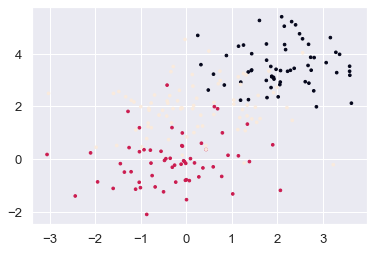

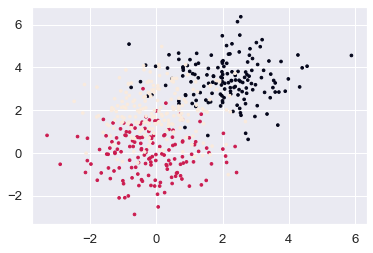

In [16]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train ,s = 7)
plt.show()

plt.scatter(x_test[:,0], x_test[:,1], c=y_test ,s = 7)
plt.show()

# Problem 1 part b - Making knn method

In [17]:
from numpy import linalg as LA
def distance(vector1, vector2):   
    d = LA.norm(vector1 - vector2)
        
    return d
        

In [20]:
## It should be noted that x_test is set up to be a single input
## Which then will be classified with knn

def knnClassifier(x_train, y_train, x_test, K):
    ## Calculate Euclidean Distance for all training points
    ## Compare Distances to find k nearest points
    ## Predict
    dist = []
    neighbors = []
    Class = []
    for i in range(len(x_train)):
        dist.append((distance(x_train[i], x_test),x_train[i],y_train[i]))
    
    
    dist.sort(key=lambda tup: tup[0])
    neighbors = dist[0:K]
    
    for i in range(len(neighbors)):
        Class.append(neighbors[i][2])
    ## Looks at the most requring class and outputs that class to assign as the class for the test input    
    m = stats.mode(Class)[0]
    
        
    return m

In [21]:
def knnSet(x_train,y_train, x_test,y_test, K,truth):
    classified = []
    for i in range(len(x_test)):
        y = knnClassifier(x_train, y_train, x_test[i], K)
        classified.append(y[0])
        
    if truth:
        score =  accuracy_score(y_test, classified)
    else: 
        score = 0
    return score, classified

# Problem 1 part c - plotting accuracy vs k and a graph of decision boundry

In [22]:
acc = []
k = [1,3, 5, 10, 15, 25, 50, 80,90,100]
for i in k:
    #score, y_predict = knnSet(x_train,y_train,X_grid,y_test,i,truth = False)
    score, classified = knnSet(x_train,y_train,x_test,y_test,i,truth = True)
    acc.append(score)
    
    #y_predict = np.array(y_predict).reshape(xx.shape)
    #plt.contourf(xx, yy, y_predict, cmap=plt.cm.coolwarm, alpha=0.8)
    #plt.scatter(x_train[:,0], x_train[:,1], c=y_train ,s = 7)
    plt.show()


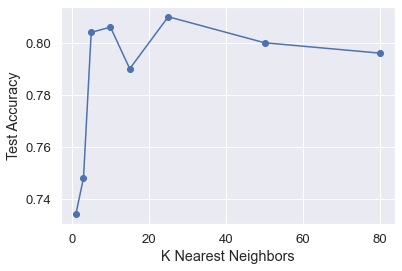

In [23]:
plt.plot(k,acc,'-o')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

In [8]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.25),
                     np.arange(y_min, y_max, 0.25))

X_grid = np.c_[xx.ravel(), yy.ravel()]

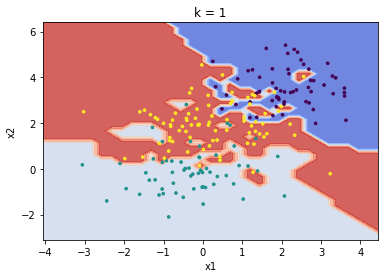

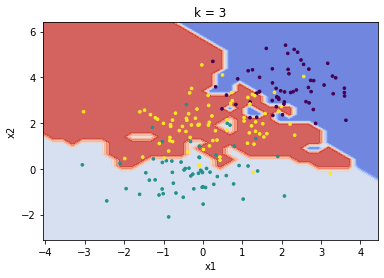

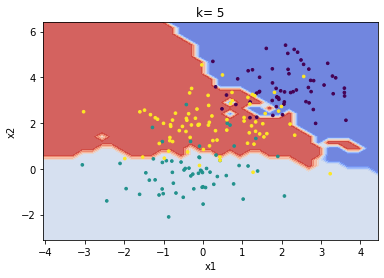

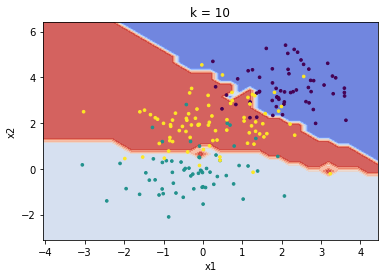

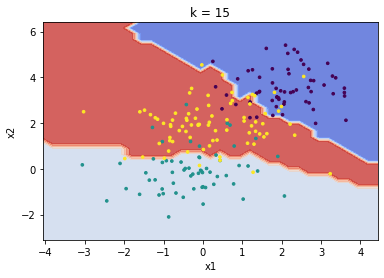

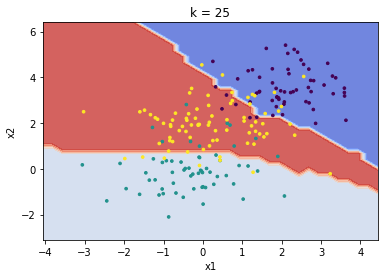

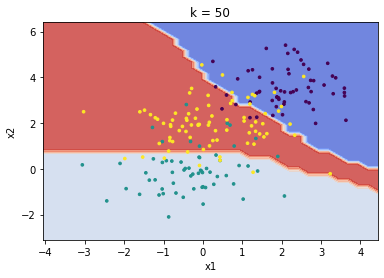

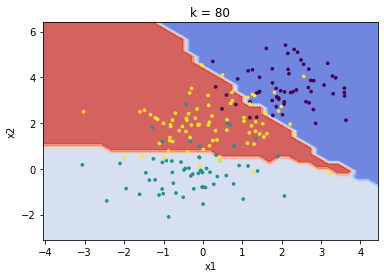

In [9]:
acc = []
k = [1,3, 5, 10, 15, 25, 50, 80]
title = ['k = 1', 'k = 3', 'k= 5', 'k = 10', 'k = 15', 'k = 25', 'k = 50', 'k = 80']
j = 0
for i in k:
    
    score, y_predict = knnSet(x_train,y_train,X_grid,y_test,i,truth = False)
    y_predict = np.array(y_predict).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_predict, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train ,s = 7)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title[j])
    j += 1
    plt.show()

The plots of the decision boundry are complex when k is small and are simpler as k increases because when k is small you are relying only on the couple neigherest training points to classify a new point which may not work as well when the data set is not seperable. When k is larger the decision boundry is simpler because you start relying on the majority of the data set to classify a new point. k has low bias high variance when it is small because, for instance when k = 1, it will get all the training data set right but when a new test data point is added it leads to high variance because it may not predict it correctly. As k increases the bias becomes higher and variance lower. 

# Problem 1 part D

In [24]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k = list(range(1,100))
#Create a default random forest object
knn = KNeighborsClassifier()

#create a list of parameters you want to tune
param_grid_knn = dict(n_neighbors =  k)

#fit the model using grid search
CV_knn = GridSearchCV(estimator = knn, param_grid=param_grid_knn, cv= 10)
CV_knn.fit(x_train, y_train.ravel())
cv_scores = cross_val_score(CV_knn, x_train, y_train.ravel(), cv=10)

#print the result of best hyperparameters
print(CV_knn.best_params_)

df = pd.DataFrame(CV_knn.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

{'n_neighbors': 90}


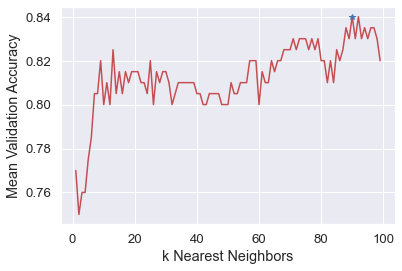

In [25]:
plt.plot(k, df['mean_test_score'], label="Cross-validation score",
                color="r")
plt.plot(90,0.84,'*')
plt.xlabel('k Nearest Neighbors')
plt.ylabel('Mean Validation Accuracy')
plt.show()

In [40]:
print(df)
#plt.plot(k, grouped_df['mean_test_score'], label="Cross-validation score",
 #               color="navy", lw=lw)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002875      0.001136         0.007935        0.001629   
1        0.002727      0.000533         0.004445        0.001246   
2        0.001297      0.001002         0.002981        0.001419   
3        0.001045      0.000195         0.001814        0.000338   
4        0.000843      0.000624         0.001732        0.000506   
..            ...           ...              ...             ...   
94       0.001636      0.001139         0.003177        0.001163   
95       0.000358      0.000789         0.004364        0.001253   
96       0.000945      0.001042         0.003044        0.001165   
97       0.000523      0.001072         0.003558        0.001450   
98       0.001070      0.001005         0.004018        0.001602   

   param_n_neighbors               params  split0_test_score  \
0                  1   {'n_neighbors': 1}               0.80   
1                  2   {'n_neighbors': 2}              

In [ ]:
###################################################################################################################

# Problem 2 Part A

In [26]:
from sklearn import preprocessing

headerList = ['column','fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

telescopeData = pd.read_csv('telescope_data.csv', header = 0, names = headerList, sep=",")

le = preprocessing.LabelEncoder()
le.fit(telescopeData['class'])
le.classes_
#print(telescopeData['class'])

## Making the data into two groups, the features and the output
x = telescopeData.loc[:, 'fLength':'fDist']
y = np.array(telescopeData['class'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=10) 

In [27]:
#Create a default random forest object
telescope_RFC = RandomForestClassifier(random_state=417)

#create a list of parameters you want to tune
param_grid_RFC = { 'n_estimators': [100, 200],'max_depth': [5,6]}

#fit the model using grid search
CV_rfc = GridSearchCV(estimator=telescope_RFC, param_grid = param_grid_RFC, cv = 10)
CV_rfc.fit(x_train, y_train)

#print the result of best hyperparameters
print(CV_rfc.best_params_)



{'max_depth': 6, 'n_estimators': 100}


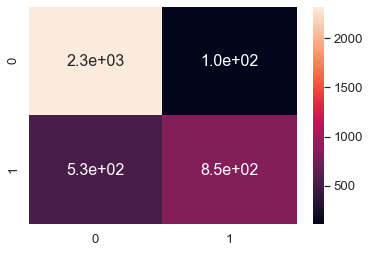

In [32]:

y_pred = CV_rfc.predict(x_test)

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()